# Rotation of Butadiene

Rotation in a conjugated system is more like a chemical reaction that rotation in an alkane. The $\pi$-system will be broken and reform as we cross the highest enetgy point. Stabilization due to conjugation is a big energy difference and we expect it to dominate in the potential energy scan. 

## Start with the Build

Let us build butadiene. I will demonstrate enforcing symmetry here by using variables in the Z-matrix to establish bonds that must remain paired in length. The symmetry will be $C_2$ throughout the bond rotation. It will be $C_{2h}$ in the flat planar form but declaring that will result in errors when the symmetry drops to $C_2$ in the rotated structures.)

In [1]:
# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()

output_file = "butadiene.log"

psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

# The Z-matrix as a text string ### From previous optimization
data = """
       0 1
    C1
    C2      1    CC1
    C3      2    CC2           1  A_321
    C4      3    CC1           2  A_321           1     dihedral
    H5      1    CH_5_9        2  CH_512          3     D3
    H6      1    CH_6_10       5  CH_615          2     D2
    H7      2    CH_7_8        1  CH_721          3     D1
    H8      3    CH_7_8        4  CH_721          2     D1
    H9      4    CH_5_9        3  CH_512          2     D3
    H10     4    CH_6_10       9  CH_615          3     D2

       symmetry c1
       dihedral  =  0
       CC1 = 1.3
       CC2 = 1.5
       CH_5_9 = 1.0
       CH_7_8 = 1.0
       CH_6_10 = 1.0
       A_321 = 120
       CH_512 = 120
       CH_615 = 120
       CH_721 = 120
       D1 = 180
       D2 = 180
       D3 = 180

       units angstrom
       """ 

# Create the Molecule object
mol = psi4.geometry(data)             # Create Molecule object from data string

# Optimize the structure
#psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = mol, return_history=True)
#energy_ts, hist = psi4.optimize("hf/6-31+G(d)", molecule = mol, return_history=True)
                                                                       
print(f"Initial energy is {energy_ts:0.7f} Hartrees")

dihedral_angle = mol.get_variable("dihedral")

print(f"After optimization: {dihedral_angle:.3f} degrees\n") 

hp.drawXYZ(mol)

# psi4.set_output_file("temp.dat", append=False, print_header=False)
# mol.print_in_input_format()
# !cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout


  Memory set to   1.863 GiB by Python driver.
Optimizer: Optimization complete!
Initial energy is -153.0179315 Hartrees
After optimization: 0.000 degrees



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## The PES Scan

Let us perform a quick PES scan using a very limited basis set, STO-3G. I will repurpose the code from the PES scan for butane. Examine the code below and spot the changes.

In [2]:
mol2 = mol.clone()

# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()
psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

output_file = "Butadiene_PES_1.log"
psi4.set_memory("4GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

step = 10; start = 0; end = 180
number_of_points = (end - start)//step + 1
range_of_values = np.linspace(start, end, number_of_points) 
#range_of_values = [0,60,120,180] 
#range_of_values = [119,119.1,119.2,119.3,119.4,119.5,119.6,119.7,119.8,119.9,120,120.1] 


dihedral_list = []
energy_list = []
geometries = []
for angle in range_of_values:
    mol2.set_variable("dihedral", angle)
    energy = psi4.optimize("hf/sto-3g", molecule = mol2)
    dihedral_list.append(angle)
    energy_list.append(energy)
    geometries.append(mol2.clone())

print("Done")


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Done


### Analyze the Data

We now have lists of dihedral angles and the energies calulated after optimizing the structure with the given frozen dihedral angle. We have also collected copies of every molecule object that resulted from these optimizations. Using this data we can plot the energy vs. torsion angle and also present in interactive display presenting the structures and their plotted energies with a slider bar to switch between them.

    angle      energy    kJ/mole
0     0.0 -153.017931   7.671128
1    10.0 -153.017919   7.702735
2    20.0 -153.017831   7.933840
3    30.0 -153.017543   8.690356
4    40.0 -153.016939  10.275816
5    50.0 -153.016000  12.742100
6    60.0 -153.014834  15.802312
7    70.0 -153.013638  18.943394
8    80.0 -153.012629  21.592541
9    90.0 -153.012015  23.204206
10  100.0 -153.011974  23.313072
11  110.0 -153.012600  21.668229
12  120.0 -153.013832  18.433426
13  130.0 -153.015441  14.208740
14  140.0 -153.017115   9.814253
15  150.0 -153.018662   5.754041
16  160.0 -153.019851   2.632730
17  170.0 -153.020599   0.668695
18  180.0 -153.020853   0.000000


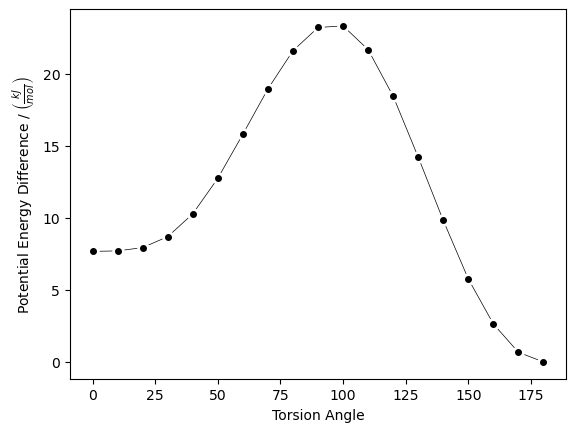

interactive(children=(IntSlider(value=0, description='quantity', max=180, step=10), Output()), _dom_classes=('…

In [14]:
data_dictionary = {"angle": dihedral_list,
                   "energy": energy_list}

df = pd.DataFrame.from_dict(data_dictionary)

df["kJ/mole"] = df["energy"] - np.min(df["energy"])
df["kJ/mole"] = df["kJ/mole"] * psi4.constants.hartree2kJmol

print(df)

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

x = df["angle"]
y = df["kJ/mole"]

ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)

ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x,y, color = "black", s = 16, zorder = 2)

# ax.vlines(x = 66.5, ymin = 0, ymax = 20, color = "black", linewidth = 0.4, zorder = 0)
# ax.scatter([66.51, 360-66.51], [3.49, 3.49], color = "white", s = 64, zorder = 1)
# ax.text(66.51-10, 20.5,"$66.5^\circ$")

ax.set_xlabel('Torsion Angle')
ax.set_ylabel(r'Potential Energy Difference /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()

energies = energies = df["energy"]
energies = energies - np.min(energies)
energies = energies * psi4.constants.hartree2kJmol
import helpers as hp

traj = [geom.save_string_xyz_file() for geom in geometries3]
traj_arrays = [geom.to_arrays()[0] for geom in geometries3]

#hp.drawXYZGeomSlider(traj)
dihedral_list1 = np.array(dihedral_list)
hp.drawXYZGeomSliderMolecularProperty(traj, dihedral_list1, energies, 'dihedral')




### Observations

The PES shows that the planar forms are lowest in energy with the dihedral being zero degrees for the *cis* conformer and 180 degrees for the *trans* conformer. This is what we might have expected as the planar structures benefit from the graetest stabilization due to the electron delocalization of conjugation.  The *cis* conformer is about 7.7 kJ/mole higher in energy than the *trans* conformer due to steric clash.

The energy gardient in the region of the *cis* conformer is very flat. The difference in energy from -10 degree to +10 degrees is 0.03 kJ/mole compare to zero degrees. The optimized structure at HF/STO-3G for the *cic* conformer had a tersion angle of 2 degrees when using $C_1$ symmetry but that was corrected easily by enforcing $C_2$ symmetry, which gave zero degrees for the torsion. The very flat energy landscape allowed the structure to minimize to angles other than zero.

This all looks so reasonable except that we know it is wrong. Extensive and much more sophisticated quantum mechanics caluclations indicate that a "twisted cis" conformer with a torsion angle of about 38 degrees is more stable than the planar *cis* conformer. [Feller, 2009] Previous spectroscopic studies have also indicated the presence of this conformer. [Engeln, 1992].<hr>

"High Level ab Initio Energies and Structures for the Rotamers of 1,3-Butadiene." D. Feller, N.C. Craig, 
*J. Phys. Chem. A*, **2009**, *113*, 1601-1607. https://doi.org/10.1021/jp8095709

"Evidence for a gauche minor conformer of 1,3-butadiene." R. Engeln, D. Consalvo, J. Reuss, *Chem. Phys.*, **1992**, *160*, 427-433. https://doi.org/10.1016/0301-0104(92)80010-S

## Another PES Scan

The STO-3G minimal basis set is placing too much weight on the electron delocalization compared to the steric interaction. Or perhaps it is not able to value the steric interaction correctly. To investigate this we will use a more extensive basis set. We could use 3-21G, 6-31+G(d), 6-31++G(d,p), or 6-311++G(d,p). Rather than HF, we could use a DFT method that incorporates dispersion effects like b3pw91.

Use the code below and go get a coffee while it runs.


In [ ]:
mol3 = mol.clone()

# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()
psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

output_file = "Butadiene_PES_2.log"
psi4.set_memory("4GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

step = 10; start = 0; end = 180
number_of_points = (end - start)//step + 1
range_of_values = np.linspace(start, end, number_of_points) 
#range_of_values = [0,60,120,180] 
#range_of_values = [119,119.1,119.2,119.3,119.4,119.5,119.6,119.7,119.8,119.9,120,120.1] 


dihedral_list3 = []
energy_list3 = []
geometries3 = []
for angle in range_of_values:
    mol3.set_variable("dihedral", angle)
#    energy = psi4.optimize("hf/6-31+G(d)", molecule = mol3)
    energy = psi4.optimize("b3pw91/6-31+G(d)", molecule = mol3)
    dihedral_list3.append(angle)
    energy_list3.append(energy)
    geometries3.append(mol3.clone())

print("Done")

In [45]:
# Collect the results in a dataframe for easy printing and data output.

data_dictionary = {"angle": dihedral_list3,
                   "energy": energy_list3}

df = pd.DataFrame.from_dict(data_dictionary)

df["kJ/mole"] = df["energy"] - np.min(df["energy"])
df["kJ/mole"] = df["kJ/mole"] * psi4.constants.hartree2kJmol

#print(df)

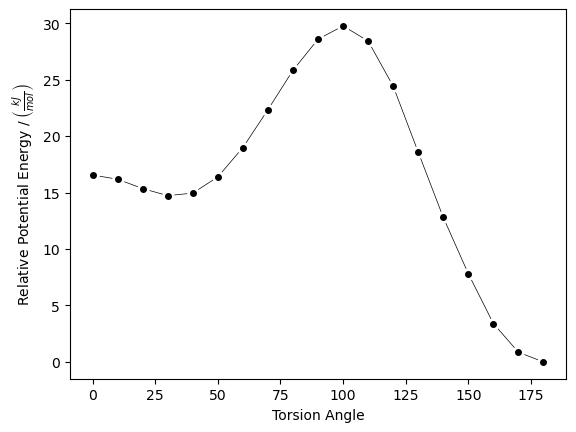

In [46]:
# Plot the energies vs the torsion angle.

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

x = df["angle"]
y = df["kJ/mole"]

ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)

ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x,y, color = "black", s = 16, zorder = 2)

# ax.vlines(x = 66.5, ymin = 0, ymax = 20, color = "black", linewidth = 0.4, zorder = 0)
# ax.scatter([66.51, 360-66.51], [3.49, 3.49], color = "white", s = 64, zorder = 1)
# ax.text(66.51-10, 20.5,"$66.5^\circ$")

#ax.set_xlim([start-10, end+10])

ax.set_xlabel('Torsion Angle')
ax.set_ylabel(r'Relative Potential Energy /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()


In [13]:
# Visualize the series of optimized structures along with the energy plot

energies = df["energy"]
energies = energies - np.min(energies)
energies = energies * psi4.constants.hartree2kJmol
import helpers as hp

traj = [geom.save_string_xyz_file() for geom in geometries3]
traj_arrays = [geom.to_arrays()[0] for geom in geometries3]

#hp.drawXYZGeomSlider(traj)
dihedral_list4 = np.array(dihedral_list3)
hp.drawXYZGeomSliderMolecularProperty(traj, dihedral_list4, energies, 'dihedral')


interactive(children=(IntSlider(value=0, description='quantity', max=180, step=10), Output()), _dom_classes=('…

In [23]:
print(traj[17])

10

 C    1.747029389417    0.607552292118    0.045278721184
 C    0.408327312045    0.602805225263   -0.051463647590
 C   -0.408327312045   -0.602805225263   -0.051463647590
 C   -1.747029389417   -0.607552292118    0.045278721184
 H    2.313969897750    1.534097960815    0.067346574175
 H    2.317239468008   -0.318077317380    0.101767365677
 H   -0.127616649192    1.552140342694   -0.095471080726
 H    0.127616649192   -1.552140342694   -0.095471080726
 H   -2.313969897750   -1.534097960815    0.067346574175
 H   -2.317239468008    0.318077317380    0.101767365677



In [40]:
int(np.asarray(dihedral_list4==20).nonzero()[0])

/var/folders/_0/pb9y62rd59n_3vs7rbl1bndm0000gn/T/ipykernel_98174/1866632485.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(np.asarray(dihedral_list4==20).nonzero()[0])


2

In [44]:
i = np.where(dihedral_list4==40)[0][0]
int(i)

4